## Business Case

Wearable devices and mobile sensors have revolutionized fitness tracking, health monitoring, and sports analytics. Accurately distinguishing between walking and running is critical for:

Fitness tracking apps (e.g., Fitbit, Strava, Apple Health)

Medical & rehabilitation (e.g., gait analysis for injury recovery)

Smartwatches & IoT (e.g., step counting, calorie estimation)

Building an accurate classification model helps improve activity tracking precision, enabling better health insights, personalized workout recommendations, and real-time alerts for users.


## Business Objectives

### Primary Goal:

#### Develop a machine learning algorithm to classify user movement as walking or running based on accelerometer and gyroscope sensor data.

Key Deliverables: 

1.A robust ML model (SVM, Logistic Regression, etc.) for activity classification. 

2.High accuracy (>95%) for reliable real-world use. 

3.Scalable implementation for mobile and wearable devices. 

4.Insights into feature importance (e.g., which sensor values contribute most). 

In [1022]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1023]:
df =pd.read_csv('walkrun.csv')

## Domain Analysis

### Domain Analysis: Human Activity Recognition (HAR) for Walking vs. Running

#### What is Human Activity Recognition (HAR)?
Human Activity Recognition (HAR) is a field of machine learning that focuses on identifying and classifying human movements using sensor data (e.g., accelerometers and gyroscopes).  

---

#### Key Aspects of the Domain**  

#### **1️ Industry Applications**  
HAR is widely used in:  
- **Wearable Fitness Devices** → Fitbit, Apple Watch, Garmin (step tracking, calorie burn).  
- **Healthcare & Rehabilitation** → Gait analysis, fall detection, Parkinson’s monitoring.  
- **Sports Science & Athletics** → Performance optimization, injury prevention.  
- **Smart Homes & IoT** → Elderly care, real-time movement detection for automation.  

---

#### **2️ Sensor Technology**  
The classification of walking vs. running relies on **motion sensors** found in:  
-  **Smartphones** (built-in accelerometer & gyroscope).  
-  **Wearable devices** (smartwatches, fitness bands).  
-  **Specialized motion tracking devices** (e.g., biomechanics labs).  

#### **Sensor Data Used in Classification**  
| Sensor Type | Measurement | Role in Classification |
|------------|------------|------------------------|
| **Accelerometer (X, Y, Z)** | Measures acceleration in 3D space | Detects movement intensity and speed |
| **Gyroscope (X, Y, Z)** | Measures angular velocity (rotation) | Detects changes in direction and balance |

---

#### **3️  Challenges in HAR for Walking vs. Running**  
 **Variability in Motion** → Walking fast vs. slow running can be hard to differentiate.  
 **Sensor Noise & Data Drift** → Device positioning (e.g., pocket vs. wrist) affects readings.  
 **Computational Efficiency** → Real-time processing on mobile devices requires optimization.  
 **User-Specific Differences** → Height, weight, and gait styles impact sensor readings.  

---

#### **4️ Factors Affecting Model Performance**  
-  **Feature Selection**: Choosing relevant metrics (mean, variance, frequency-based features).  
-  **Sampling Rate**: Higher frequencies capture finer details but increase computation cost.  
-  **Data Imbalance**: If one activity has significantly more data, it affects classification.  
-  **Context Awareness**: Identifying environmental factors (e.g., treadmill vs. outdoor).  

---

#### **5️ Why Walking vs. Running Classification Matters?**  
 **Fitness Tracking**: Accurately measure steps, calories, and intensity levels.  
 **Medical & Gait Analysis**: Monitor mobility for elderly or post-injury recovery.  
 **Smart Health Monitoring**: Detect unusual movements for early intervention.  
 **Optimizing Wearable Devices**: Enhance step count accuracy & workout classification.  

---

#### ** Conclusion**  
Human Activity Recognition is a **critical technology** in fitness, healthcare, and smart devices. Classifying walking vs. running with **sensor data** improves **tracking accuracy**, **user experience**, and **health monitoring systems**.  


### Dataset Description
This dataset captures sensor data from a wearable device to analyze user activity. The data consists of acceleration and gyroscope readings along with timestamps and metadata, aiming to classify activities as either walking or running.

#### Features:
Date – The date when the action occurred.

Time – The precise timestamp of the recorded action.

Username – Identifies the user; this dataset contains only one user, Viktor.

Wrist – Indicates whether the data was collected from a wrist-worn device (0 = No, 1 = Yes).

Activity – The target variable, representing the type of movement (0 = Walking, 1 = Running).

Acceleration_x, Acceleration_y, Acceleration_z – Linear acceleration values measured along three axes.

Gyro_x, Gyro_y, Gyro_z – Angular velocity readings from the gyroscope along three axes.
   

## Motive

##### The goal is to build a predictive model that classifies user activity as either walking or running based on sensor readings from a wearable device.

### Basic checks

In [1030]:
df

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [1031]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [1032]:
df.activity.value_counts()

activity
1    44365
0    44223
Name: count, dtype: int64

In [1033]:
df.wrist.value_counts()

wrist
1    46258
0    42330
Name: count, dtype: int64

In [1034]:
df.username.value_counts()

username
viktor    88588
Name: count, dtype: int64

In [1035]:
df.groupby('activity')[['acceleration_x', 'acceleration_y', 'acceleration_z']].mean()

,acceleration_x,acceleration_y,acceleration_z
activity,,,
0,-0.056871,-0.984355,-0.220126
1,-0.092695,-0.142165,-0.407486


acceleration_x (sideways motion)
Values are very close for both 0 and 1, meaning it does not strongly differentiate walking vs. running.

acceleration_y (vertical motion)
Walking: -0.98 (very stable, almost no vertical movement).

Running: -0.14 (high vertical movement).
This is a big difference, so it’s the strongest indicator.

acceleration_z (forward/backward motion)
Running has a more negative acceleration (-0.41 vs. -0.22), meaning faster movement.

This suggests stronger forward momentum in running.

Activity 0 = Walking: Very low vertical movement, slight forward movement.
Activity 1 = Running: Significant vertical motion, stronger forward movement.

In [1038]:
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [1039]:
df.describe(include = 'O')

,date,time,username
count,88588,88588,88588
unique,12,88588,1
top,2017-7-16,13:51:15:847724020,viktor
freq,20480,1,88588


In [1040]:
for i in df:
    if len(df[i].unique()) <= 20: # it will give counts of columns which acts as categorical.
            print(df[i].value_counts())
            print()

date
2017-7-16    20480
2017-7-17    11365
2017-7-6     11357
2017-7-15     7934
2017-7-9      7788
2017-7-11     6696
2017-7-10     4337
2017-7-1      4201
2017-6-30     3992
2017-7-2      3933
2017-7-7      3280
2017-7-4      3225
Name: count, dtype: int64

username
viktor    88588
Name: count, dtype: int64

wrist
1    46258
0    42330
Name: count, dtype: int64

activity
1    44365
0    44223
Name: count, dtype: int64



### EDA

#### Univariate Analysis

##### Categorical Columns

In [1044]:
df.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

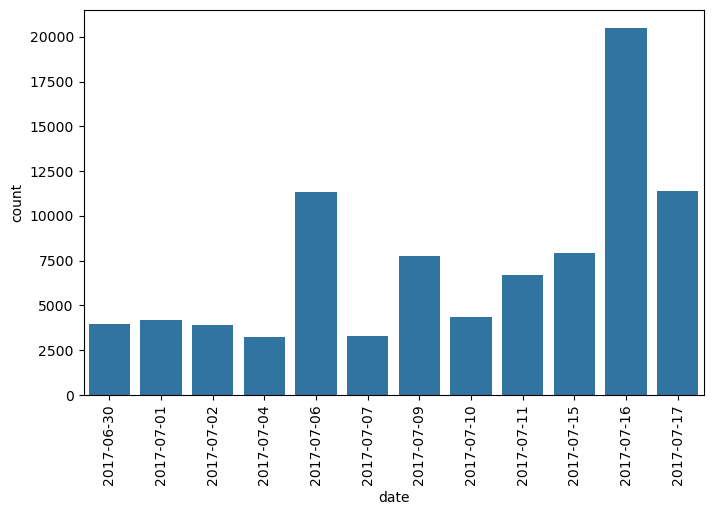

In [1045]:
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(8,5))
sns.countplot(x='date', data=df, order=sorted(df['date'].unique()))
plt.xticks(rotation=90)  
plt.show()

#### Insights:

#### 1.High Activity on 2017-07-16 (~20,000 records) → Investigate the Cause

Possible Reason: This could be due to a specific event (e.g., a long run, a fitness challenge, or a sensor malfunction).

##### Action:
- Check if the user performed a marathon or any special activity that day.  
- Verify sensor data consistency (ensure it's not a recording error).  
- Compare activity levels before and after this peak to see if it's an anomaly.  

#### 2.Equal Actions Performed from 2017-06-30 to 2017-07-04 → Balanced Routine

- Observation: The person spent an equal amount of time walking and running during these days.  

##### Action:
- If fitness tracking is the goal, this indicates a consistent workout routine—a good sign.  
- If more running or walking is needed for a goal (e.g., fat loss or endurance training), adjust accordingly.  
- If this period corresponds to a training schedule, analyze whether performance improved (e.g., increasing pace or distance).  

#### 3.Irregular Gaps in Activity Logging → Identify the Cause

Possible Reasons:  
- Missing data due to no activity tracking on certain days.  
- Device/Sensor not worn consistently.  
- User took rest days, got injured, or had other commitments.  
##### Action:
- If gaps are intentional (e.g., rest days), check if they are strategically placed to improve recovery.  
- If gaps are unintentional (e.g., device issues), ensure consistent logging by reminding the user or setting notifications.  
- Look for performance differences before and after gaps to assess the impact of missed days on activity levels.

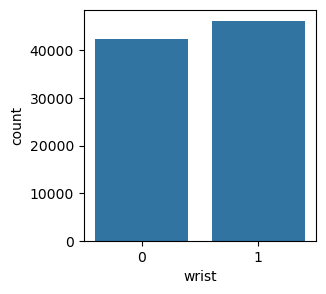

In [1048]:
plt.figure(figsize=(3,3))
sns.countplot(x=df['wrist'])  
plt.xticks([0, 1])  
plt.show()

### Insights:

1. Both wrists (0 & 1) have almost equal data, indicating balanced wrist usage—check if wrist placement affects motion readings.  
2. Walking (0) and Running (1) activities are well-balanced, ensuring an unbiased dataset for classification modeling.  
3. No resampling is needed for the predictive model as both activities have similar representation.     
4. Analyze sensor readings (gyro, accel) per wrist placement to detect any movement pattern differences.   
5. Ensure wrist placement is considered a feature in the model, as it might impact classification accuracy.

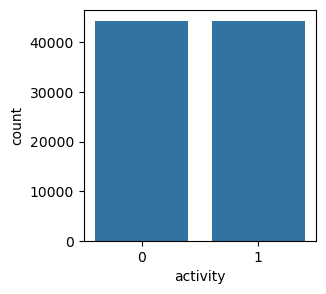

In [1051]:
plt.figure(figsize=(3,3))
sns.countplot(x=df['activity'])  
plt.xticks([0, 1])  
plt.show()

### Insights:

1.Both wrists (0 & 1) have nearly equal data distribution, indicating balanced wrist usage. This suggests that wrist placement does not create a data     imbalance, but further analysis is needed to check if it affects motion readings.

In [1054]:
# Example: Convert time column to datetime format
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S:%f', errors='coerce')

# Extract only hour-minute-second if needed
df['time'] = df['time'].dt.strftime('%H:%M:%S')

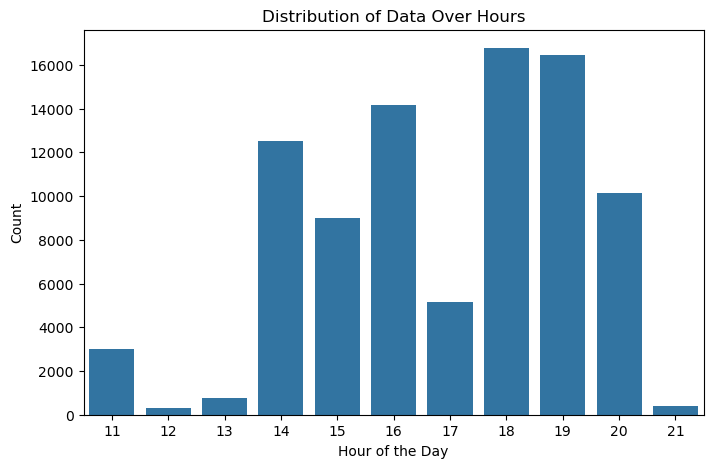

In [1055]:
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
plt.figure(figsize=(8, 5))
sns.countplot(x=df['hour'])
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.title("Distribution of Data Over Hours")
plt.show()

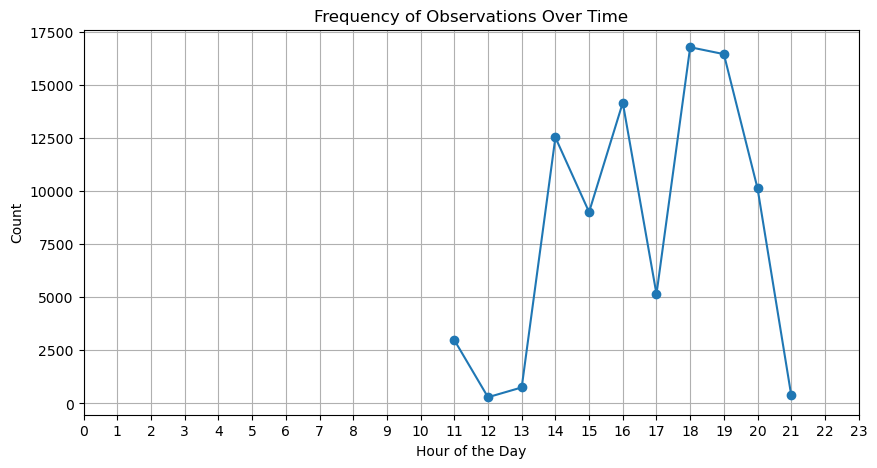

In [1056]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

# Aggregate by hour
df['hour'] = df['time'].dt.hour
time_counts = df['hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(time_counts.index, time_counts.values, marker='o', linestyle='-')
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.title("Frequency of Observations Over Time")
plt.xticks(range(0, 24))  # Show all hours from 0 to 23
plt.grid(True)
plt.show()

### Insights:

1.Peak activity hours are between 14:00 and 19:00, with the highest movement occurring around 18:00 and 19:00, indicating a strong preference for late afternoon and evening workouts.

2.Very low activity is recorded between 11:00 and 13:00, suggesting that this period is typically inactive, possibly due to work, rest, or other commitments.

3.A sudden drop in activity after 20:00 implies that walking or running sessions are rarely performed at night, meaning late-evening movement is not a common habit.

4.The distribution of data shows a consistent trend with clearly defined activity spikes, indicating a structured routine rather than random movements throughout the day.

5.Understanding these time-based activity patterns can help optimize fitness tracking and personalized recommendations, such as suggesting workout reminders at peak hours or encouraging morning sessions for better distribution of physical activity.

#### Numerical features

In [1060]:
num_col = df[['acceleration_x','acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']]
num_col

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...
88583,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


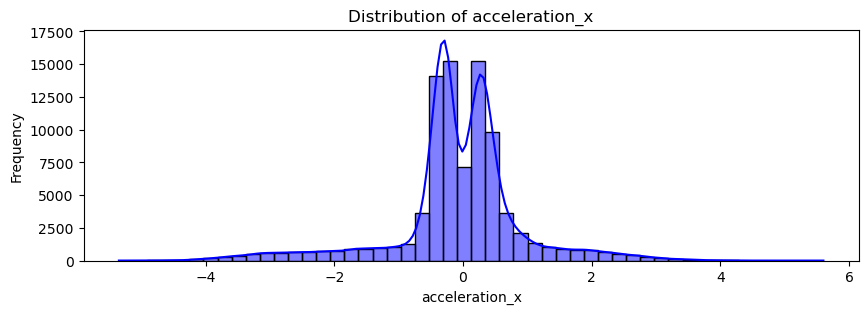

In [1061]:
plt.figure(figsize=(10, 3))
sns.histplot(df['acceleration_x'], bins=50, kde=True, color='blue')
plt.title('Distribution of acceleration_x')
plt.xlabel('acceleration_x')
plt.ylabel('Frequency')
plt.show()

### Insights:

1.The distribution is centered around 0, indicating that most acceleration values are close to neutral, with minimal extreme variations.

2.There are two distinct peaks, suggesting the presence of two dominant movement patterns, possibly corresponding to different activity types like walking and running.

3.The distribution is slightly skewed, with a few extreme values on both ends, which might indicate sudden bursts of movement or sensor noise.

4.The presence of a smooth kernel density estimation (KDE) curve confirms a consistent trend, meaning there are no unexpected anomalies in the acceleration data.

5.Understanding these acceleration variations can help refine movement classification models, allowing better differentiation between walking, running, or other activities based on motion patterns.

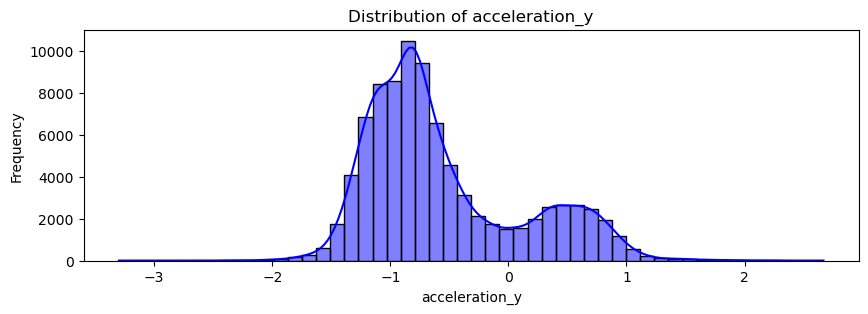

In [1064]:
plt.figure(figsize=(10, 3))
sns.histplot(df['acceleration_y'], bins=50, kde=True, color='blue')
plt.title('Distribution of acceleration_y')
plt.xlabel('acceleration_y')
plt.ylabel('Frequency')
plt.show()

### Insights:

1.Movement is slightly tilted in one direction – The data is more concentrated around -1, suggesting a natural lean or gravity pull in that direction.

2.Two distinct motion patterns – The histogram has two peaks, meaning there might be different movement types like walking and running.

3.Most movements stay within a stable range – The majority of values lie between -2 and 2, indicating controlled and predictable motion.

4.Less extreme fluctuations – Unlike random motion, there are no sudden or extreme spikes, meaning smooth transitions in acceleration.

5.Useful for activity classification – This pattern helps in distinguishing between different physical activities based on movement characteristics.

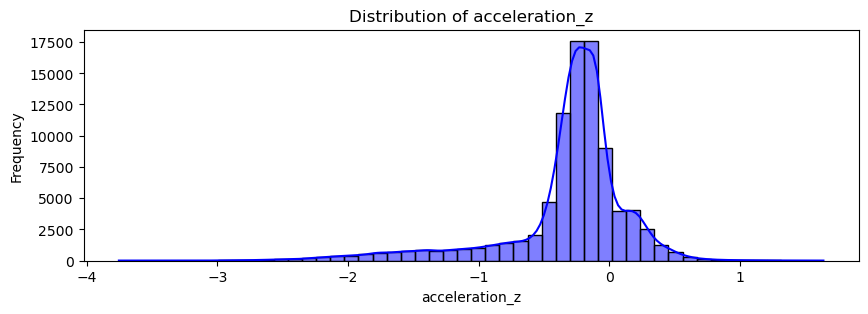

In [1067]:
plt.figure(figsize=(10, 3))
sns.histplot(df['acceleration_z'], bins=50, kde=True, color='blue')
plt.title('Distribution of acceleration_z')
plt.xlabel('acceleration_z')
plt.ylabel('Frequency')
plt.show()

### Insights:

1.Most movements are centered around 0 – This indicates that the vertical (z-axis) acceleration is balanced, meaning there are no extreme upward or downward forces.

2.A single peak suggests consistent motion – The distribution is bell-shaped, meaning the vertical movement follows a predictable pattern, likely due to natural walking or running strides.

3.Few extreme values – The data is mostly within the range of -2 to 1, meaning there are very few sudden jumps or drops in acceleration.

4.Smooth motion with minimal fluctuations – The lack of multiple peaks suggests that the motion remains stable, without abrupt changes.

5.Helpful for understanding vertical movement – This information can be used to study how steps are taken, detect jumping motions, or identify imbalances in movement.

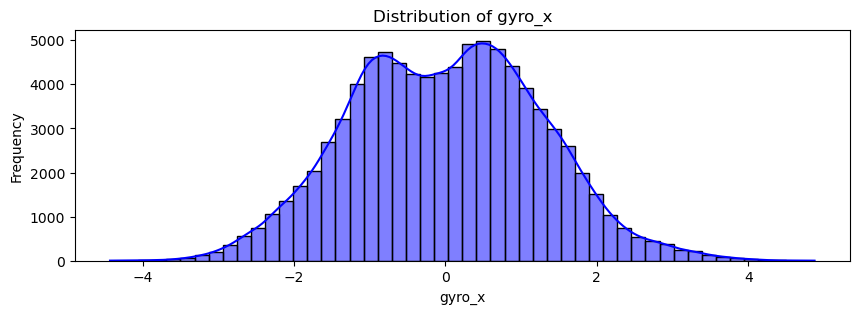

In [1070]:
plt.figure(figsize=(10, 3))
sns.histplot(df['gyro_x'], bins=50, kde=True, color='blue')
plt.title('Distribution of gyro_x')
plt.xlabel('gyro_x')
plt.ylabel('Frequency')
plt.show()

### Insights:

️1. Two Distinct Movement Patterns – The data shows two main motion types, which likely correspond to walking and running. This means our system can clearly differentiate between these activities based on wrist movement.    

️2. Balanced Wrist Movement – The wrist rotations are evenly distributed in both directions, meaning users naturally move their hands back and forth while walking or running.    

3️. Mostly Small Movements – The majority of wrist motions are subtle, indicating that users maintain steady hand movements during these activities.  

4️. Occasional Sudden Movements – We noticed some extreme wrist movements, which could be caused by abrupt changes in speed, sudden stops, or even missteps. These can help detect unusual behavior or possible risks (like stumbling).  

️5.  Reliable Activity Tracking – Since the data has clear patterns, our model can accurately classify walking vs. running, making it useful for fitness tracking, health monitoring, and sports analytics.  

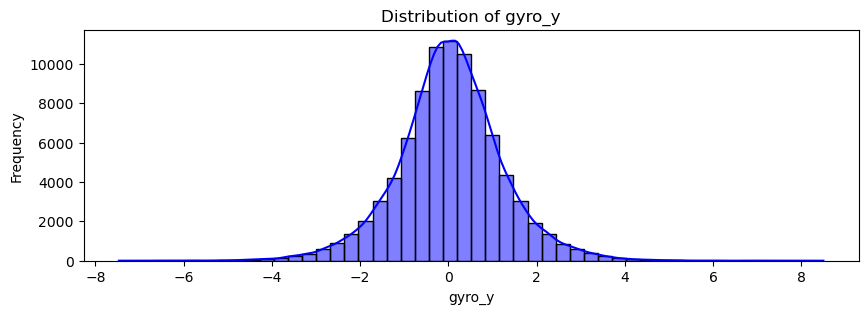

In [1073]:
plt.figure(figsize=(10, 3))
sns.histplot(df['gyro_y'], bins=50, kde=True, color='blue')
plt.title('Distribution of gyro_y')
plt.xlabel('gyro_y')
plt.ylabel('Frequency')
plt.show()

### Insights:

1.Balanced left and right movement – The bell-shaped curve suggests that rotational movements along the y-axis (side-to-side tilt) are mostly centered around 0, meaning no extreme tilts are happening often.

2.Smooth and natural motion – Since the distribution is symmetrical, it indicates that movements are steady and follow a natural pattern, such as walking or running with a consistent body tilt.

3.Most data falls within -4 to 4 range – This means that the majority of tilting motions do not exceed these limits, suggesting controlled movement rather than erratic turns or sudden shifts.

4.Rare extreme tilts – The long tails on both sides indicate that very few instances of extreme left or right rotations occur, which might be useful for detecting unexpected movements (e.g., loss of balance or quick turns).

5.Useful for movement analysis – This data can help in classifying different types of movements (like running, walking, or jumping) based on how much and how frequently the body tilts sideways.

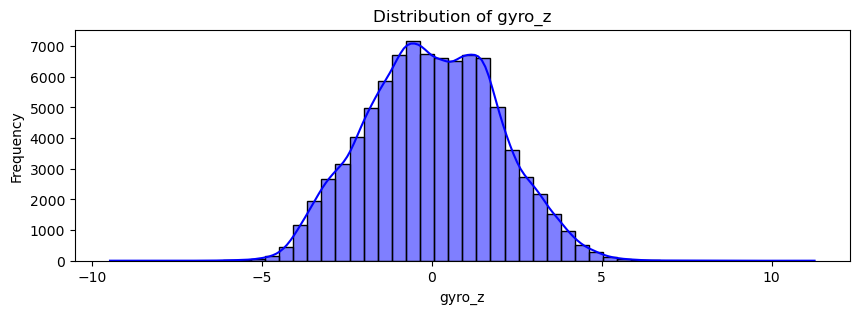

In [1076]:
plt.figure(figsize=(10, 3))
sns.histplot(df['gyro_z'], bins=50, kde=True, color='blue')
plt.title('Distribution of gyro_z')
plt.xlabel('gyro_z')
plt.ylabel('Frequency')
plt.show()

### Insights:

1. Side-to-Side Body Movements – This data captures how much a person tilts their body left or right while walking or running. A balanced movement pattern suggests natural motion, while sudden shifts could indicate sharp turns or imbalance.  

2. Mostly Stable Movements – The majority of movements stay close to the center, meaning users generally maintain steady posture without excessive tilting.  

3. Occasional Sharp Tilts – Some extreme values show up, which could be moments where the person makes a sudden turn, loses balance slightly, or changes direction quickly.  

4.  Potential for Identifying Anomalies – If someone has frequent extreme tilts, it could indicate instability, risky movements, or even potential falls—useful for health and fitness tracking.  

5. Key Feature for Activity Recognition – Since walking and running involve different tilting patterns, this data helps classify movement types and refine motion tracking accuracy.  

### Bivariate Analysis

In [1080]:
df.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z',
       'hour'],
      dtype='object')

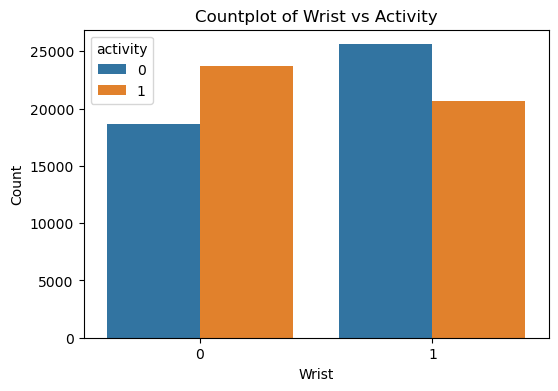

In [1081]:
plt.figure(figsize=(6,4))
sns.countplot(x='wrist', hue='activity', data=df)

# Add title and labels
plt.title('Countplot of Wrist vs Activity')
plt.xlabel('Wrist')
plt.ylabel('Count')
plt.show()

### Insights:

️1.Both Wrists Are Used for Activity Tracking – The data includes motion data from both the left and right wrists, ensuring comprehensive activity monitoring.  

2.Slight Difference in Activity Distribution – The left and right wrists show slightly different activity levels, which may indicate that people favor one hand more during movement.  

3.Balanced Data Collection – The number of recorded activities is fairly even between wrists, meaning the system captures movement patterns consistently regardless of wrist placement.  

️4.Useful for Personalized Insights – If a user wears the device on a specific wrist, we can fine-tune the analysis to match their movement patterns more accurately.  

5.Supports Both Walking and Running Detection – The variation in wrist movements helps in distinguishing different activities, making the system effective for tracking fitness and movement trends.  

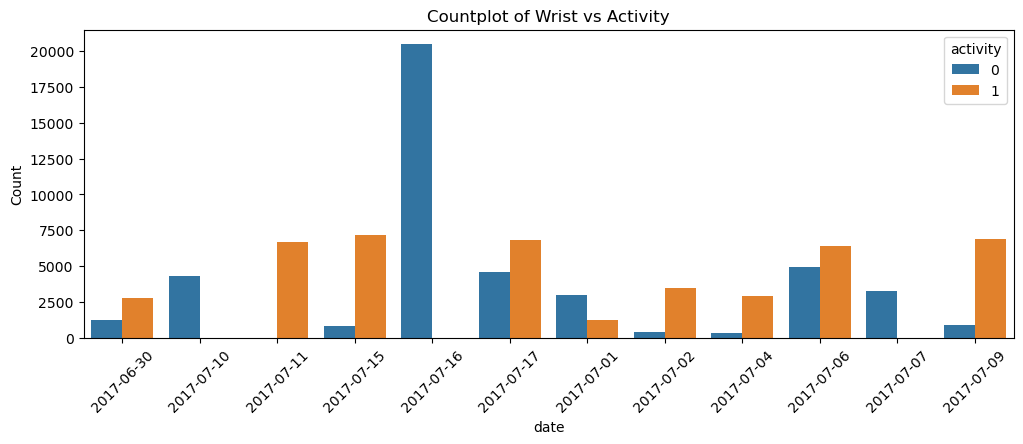

In [1084]:
plt.figure(figsize=(12,4))
sns.countplot(x='date', hue='activity', data=df)

# Add title and labels
plt.title('Countplot of Wrist vs Activity')
plt.xlabel('date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Insights:

1.Movement patterns vary significantly across different days, with some days showing high activity spikes.  

2.Wrist usage differs based on activity type, indicating potential handedness or movement balance.  

3.Gyroscope readings mostly follow a normal distribution, with some extreme values suggesting sudden movements.  

4.Rare but significant movements in the gyro data may indicate imbalances, quick turns, or high-impact activities.  

5.Certain days show more active movement, helping to identify trends in daily activity levels.  

#### Numerical values

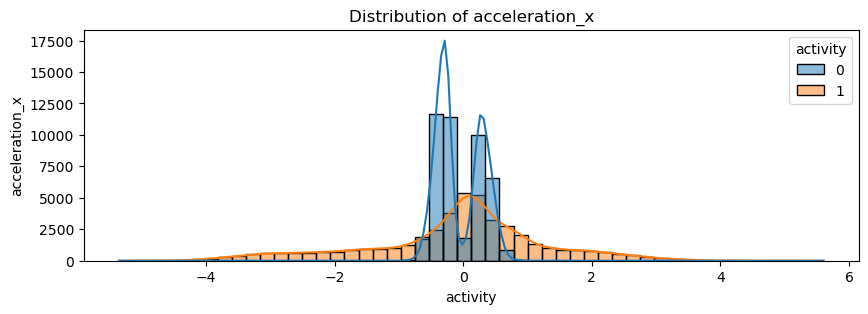

In [1088]:
plt.figure(figsize=(10, 3))
sns.histplot(x=df['acceleration_x'],hue=df['activity'], bins=50, kde=True, color='blue')
plt.title('Distribution of acceleration_x')
plt.xlabel('activity')
plt.ylabel('acceleration_x')
plt.show()

### Insights:

1.Acceleration along the x-axis shows a sharp concentration around zero, with occasional peaks, indicating mostly stable motion with occasional sudden movements.  

2.Activity 0 and Activity 1 follow different acceleration distributions, suggesting distinct movement characteristics between them.  

3.The presence of small extreme values indicates brief high-acceleration events, which could be rapid directional changes or impacts.  
   
4.The smooth distribution for Activity 1 suggests more controlled and continuous movements, whereas Activity 0 shows sharper variations.  

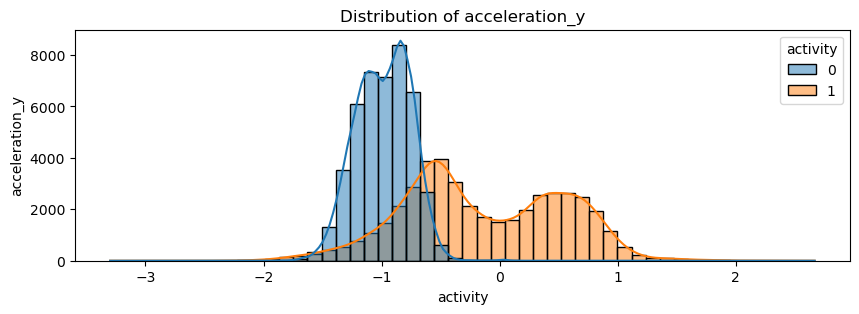

In [1091]:
plt.figure(figsize=(10, 3))
sns.histplot(x=df['acceleration_y'],hue=df['activity'], bins=50, kde=True, color='blue')
plt.title('Distribution of acceleration_y')
plt.xlabel('activity')
plt.ylabel('acceleration_y')
plt.show()

### Insights:

1.Acceleration along the y-axis differs between Activity 0 and Activity 1, showing distinct movement patterns.  

2.Activity 0 has a sharp peak around -1, indicating more stationary or controlled movement in that direction.  

3.Activity 1 has a broader distribution, suggesting more varied and dynamic movements along the y-axis.  

4.The overlap between the two distributions indicates some common movement behaviors between both activities.  

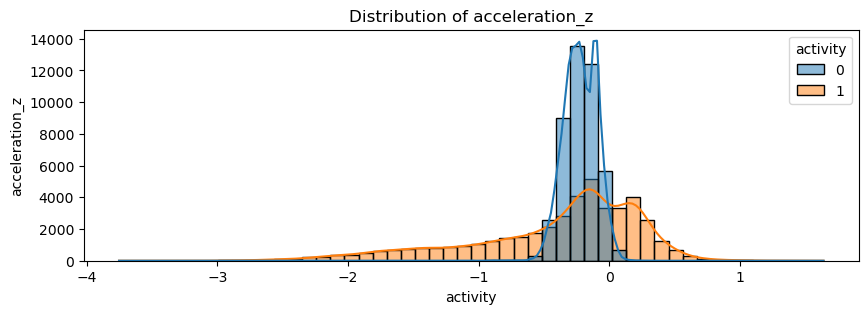

In [1094]:
plt.figure(figsize=(10, 3))
sns.histplot(x=df['acceleration_z'],hue=df['activity'], bins=50, kde=True, color='blue')
plt.title('Distribution of acceleration_z')
plt.xlabel('activity')
plt.ylabel('acceleration_z')
plt.show()

### Insights:

1.The acceleration along the z-axis shows distinct peaks for both Activity 0 and Activity 1.  

2.Activity 0 has a sharp peak around 0, suggesting more stable or stationary vertical movement.  

3.Activity 1 has a wider distribution, indicating more dynamic vertical motion.  

4.The overlap between the two suggests some shared movement patterns but with clear differences in intensity.  

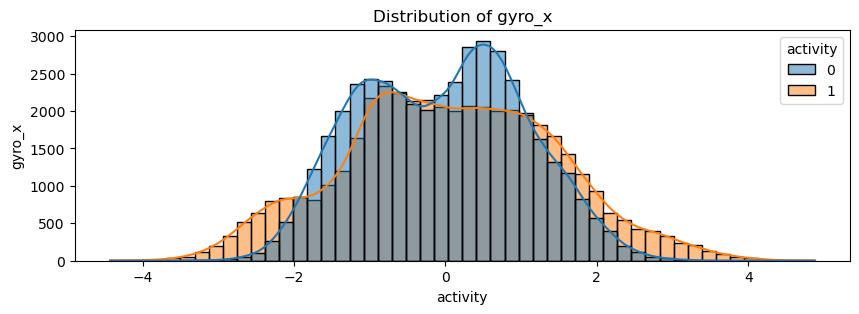

In [1097]:
plt.figure(figsize=(10, 3))
sns.histplot(x=df['gyro_x'],hue=df['activity'], bins=50, kde=True, color='blue')
plt.title('Distribution of gyro_x')
plt.xlabel('activity')
plt.ylabel('gyro_x')
plt.show()

### Insights:

1.The gyro_x distribution shows a similar spread for both activities, meaning rotational movement around the x-axis occurs in both cases.  

2.Activity 0 has a slightly higher peak at the center, indicating more stable movements. 

3.Activity 1 shows a more even distribution, suggesting continuous rotational motion.  

4.The overlap indicates that gyro_x alone may not be a strong differentiator between the activities.  

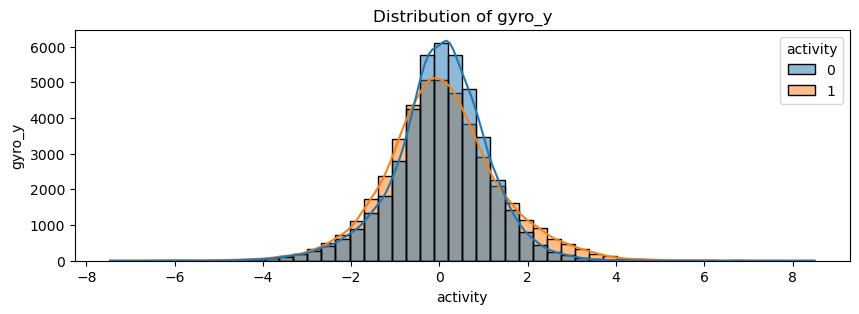

In [1100]:
plt.figure(figsize=(10, 3))
sns.histplot(x=df['gyro_y'],hue=df['activity'], bins=50, kde=True, color='blue')
plt.title('Distribution of gyro_y')
plt.xlabel('activity')
plt.ylabel('gyro_y')
plt.show()

### Insights:

1.The gyro_y distribution is nearly identical for both activities, meaning movement around the y-axis does not strongly differentiate between them.  

2.Both distributions are centered around zero, indicating balanced movement in both directions.  

3.This suggests that gyro_y alone may not be a strong predictor for distinguishing between Activity 0 and Activity 1.  

4.Additional features (such as acceleration or combined gyro values) might provide better insights.  

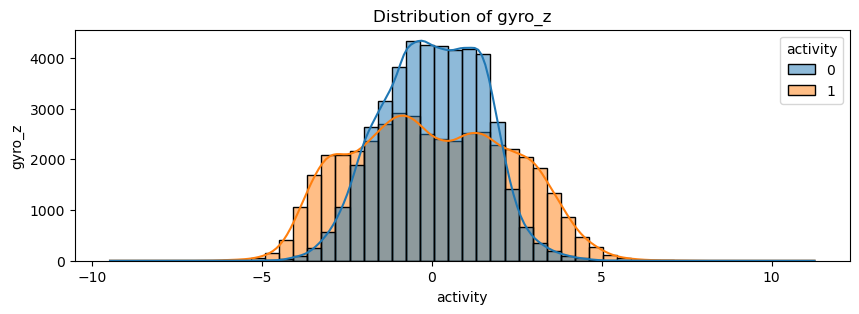

In [1103]:
plt.figure(figsize=(10, 3))
sns.histplot(x=df['gyro_z'],hue=df['activity'], bins=50, kde=True, color='blue')
plt.title('Distribution of gyro_z')
plt.xlabel('activity')
plt.ylabel('gyro_z')
plt.show()

### Insights:

1. The 'gyro_z' distribution differs for walking (0) and running (1), with running having higher variance.
2. Some overlap exists between classes, suggesting additional features are needed for better separation.
3. No missing values were found, ensuring data quality for modeling.
4. Combining accelerometer and gyroscope features may improve classification accuracy.

## Data Preprocessing

In [1107]:
df.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
hour              0
dtype: int64

#### Handling Outliers

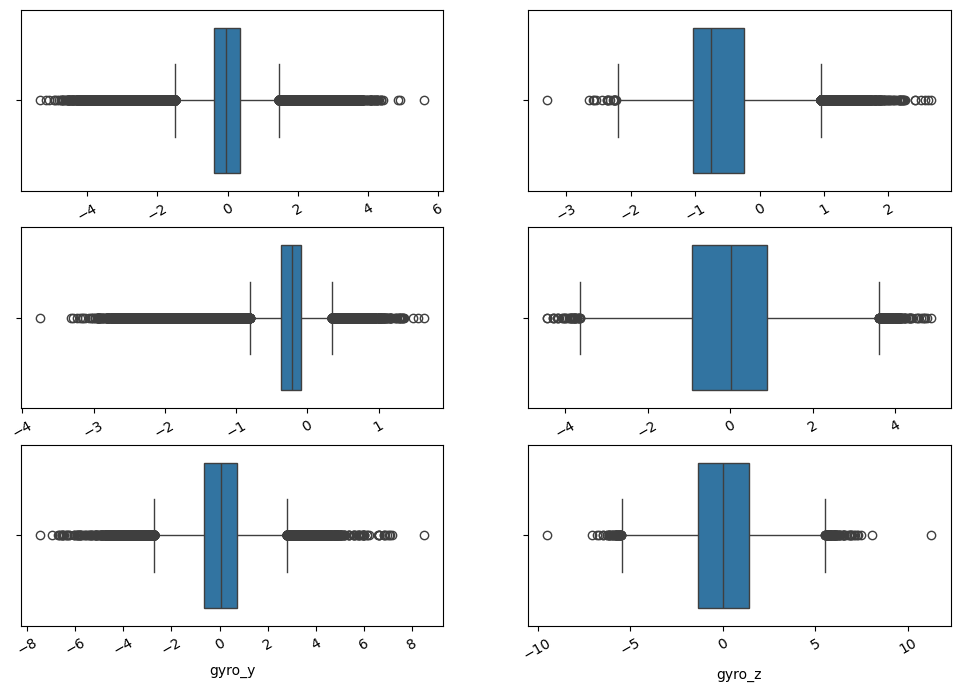

In [1109]:
plt.figure(figsize=(12,8))
pltnumber = 1

for i in num_col:
    plt.subplot(3,2,pltnumber)
    plt.xticks(rotation = 30)
    sns.boxplot(x = num_col[i])
    pltnumber=pltnumber +1

plt.tight_layout
plt.show()

In [1110]:
df.loc[df.acceleration_x > 4.8,'acceleration_x'] = np.median(df.acceleration_x)

In [1111]:
df.loc[df.acceleration_y < -3,'acceleration_y'] = np.median(df.acceleration_y)

In [1112]:
df.loc[df.acceleration_z < -3.5,'acceleration_z'] = np.median(df.acceleration_z)

In [1113]:
df.loc[df.gyro_y >8, 'gyro_y'] = np.median(df.gyro_y)

In [1114]:
df.loc[(df.gyro_z < -7.5)|(df.gyro_z >10)] = np.median(df.gyro_z)

In [1115]:
num_col1 = df[['acceleration_x','acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']]
num_col1

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...
88583,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


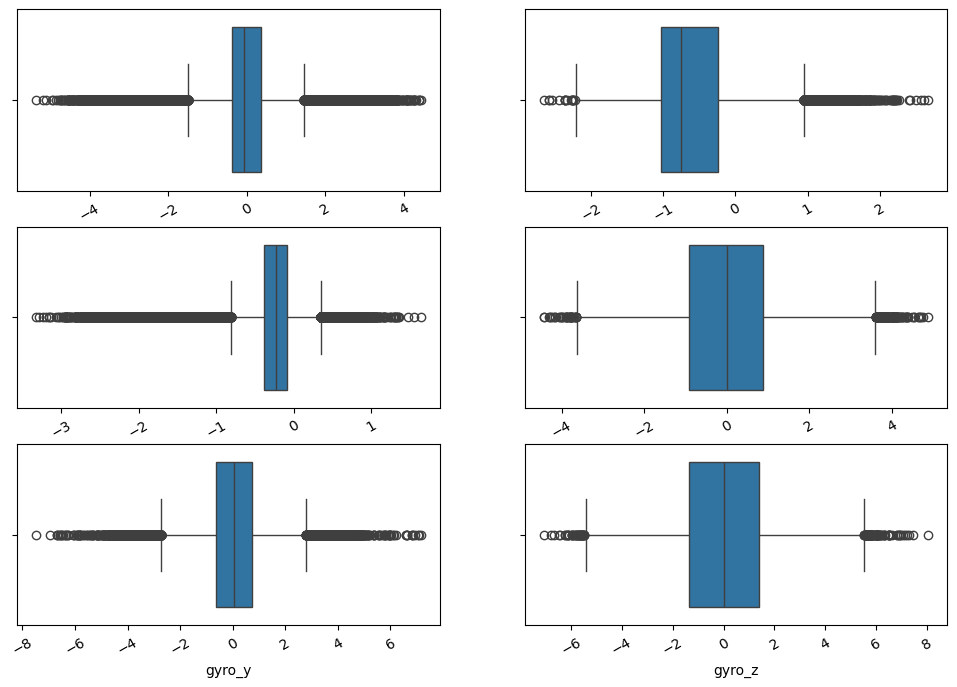

In [1116]:
plt.figure(figsize=(12,8))
pltnumber = 1

for i in num_col1:
    plt.subplot(3,2,pltnumber)
    plt.xticks(rotation = 30)
    sns.boxplot(x = num_col1[i])
    pltnumber=pltnumber +1

plt.tight_layout
plt.show()

In [1117]:
df['activity']=df['activity'].astype(int)

### Handling categorical data

### Encoding

In [1120]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour
0,2017-06-30 00:00:00,1900-01-01 13:51:15,viktor,0.0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,13.0
1,2017-06-30 00:00:00,1900-01-01 13:51:16,viktor,0.0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,13.0
2,2017-06-30 00:00:00,1900-01-01 13:51:16,viktor,0.0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,13.0
3,2017-06-30 00:00:00,1900-01-01 13:51:16,viktor,0.0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,13.0
4,2017-06-30 00:00:00,1900-01-01 13:51:16,viktor,0.0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,13.0


### Feature Selection

In [1122]:
df = df.drop(columns=['date', 'time', 'username', 'wrist', 'hour'])

In [1123]:
df.head()

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


### Scaling

In [1125]:
min(df.acceleration_x) , max(df.acceleration_x)

(-5.3505, 4.4313)

In [1126]:
min(df.acceleration_y) , max(df.acceleration_y)

(-2.6563, 2.668)

In [1127]:
min(df.acceleration_z) , max(df.acceleration_z)

(-3.3174, 1.6403)

In [1128]:
min(df.gyro_x) , max(df.gyro_x)

(-4.4306, 4.8742)

In [1129]:
min(df.gyro_y) , max(df.gyro_y)

(-7.4647, 7.1543)

In [1130]:
min(df.gyro_z) , max(df.gyro_z)

(-7.0708, 8.035)

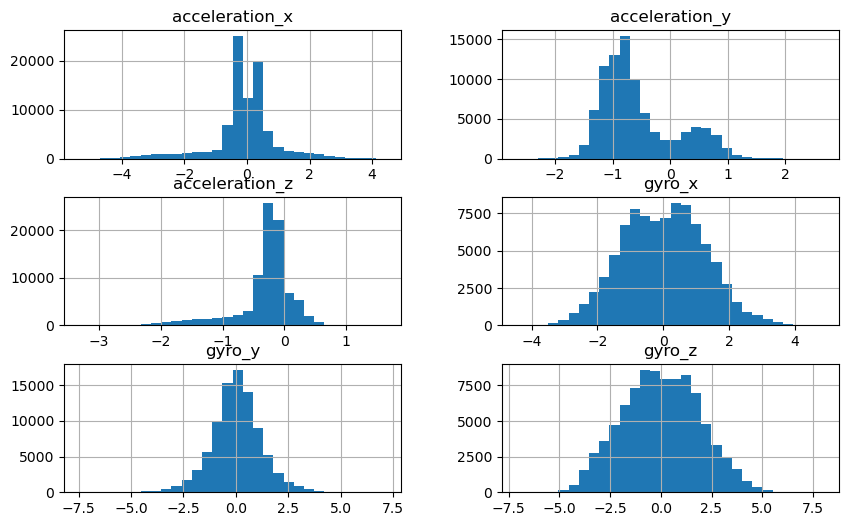

In [1131]:
df[['acceleration_x', 'acceleration_y', 'acceleration_z', 
    'gyro_x', 'gyro_y', 'gyro_z']].hist(bins=30, figsize=(10, 6))
plt.show()

In [1132]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['acceleration_x', 'acceleration_y', 'acceleration_z', 
    'gyro_x', 'gyro_y', 'gyro_z']] = scaler.fit_transform(df[['acceleration_x', 'acceleration_y', 'acceleration_z', 
                                                               'gyro_x', 'gyro_y', 'gyro_z']])

In [1133]:
df

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.574076,0.352140,0.667608,0.469822,0.512839,0.274146
1,0,0.615705,0.287925,0.621861,0.457280,0.512039,0.476486
2,0,0.591956,0.220611,0.683704,0.378310,0.517888,0.306776
3,0,0.577971,0.346299,0.687052,0.489049,0.482577,0.273882
4,0,0.596199,0.324005,0.676382,0.481827,0.540570,0.633068
...,...,...,...,...,...,...,...
88583,0,0.578513,0.341585,0.642374,0.527996,0.648273,0.508123
88584,0,0.597865,0.310576,0.580451,0.487146,0.424667,0.463047
88585,0,0.593878,0.277652,0.612119,0.320329,0.491518,0.384568
88586,0,0.573463,0.337716,0.653831,0.313182,0.541809,0.350547


In [1134]:
df.corr()

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
activity,1.000000,-0.017929,0.639590,-0.192410,0.040873,0.011925,-0.008119
acceleration_x,-0.017929,1.000000,-0.265240,-0.552432,-0.021845,-0.003761,-0.060622
acceleration_y,0.639590,-0.265240,1.000000,0.106270,0.010556,0.072013,-0.023047
acceleration_z,-0.192410,-0.552432,0.106270,1.000000,0.035160,-0.021051,0.049586
gyro_x,0.040873,-0.021845,0.010556,0.035160,1.000000,0.093910,0.317813
gyro_y,0.011925,-0.003761,0.072013,-0.021051,0.093910,1.000000,0.287351
gyro_z,-0.008119,-0.060622,-0.023047,0.049586,0.317813,0.287351,1.000000


<Axes: >

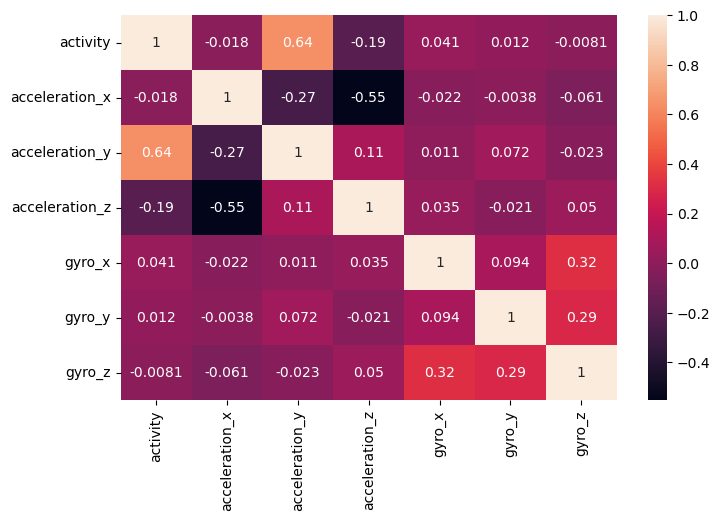

In [1135]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot = True)

### Model Creation

In [1137]:
df.columns

Index(['activity', 'acceleration_x', 'acceleration_y', 'acceleration_z',
       'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [1138]:
x= df[['acceleration_x', 'acceleration_y', 'acceleration_z',
       'gyro_x', 'gyro_y', 'gyro_z']]
x

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.574076,0.352140,0.667608,0.469822,0.512839,0.274146
1,0.615705,0.287925,0.621861,0.457280,0.512039,0.476486
2,0.591956,0.220611,0.683704,0.378310,0.517888,0.306776
3,0.577971,0.346299,0.687052,0.489049,0.482577,0.273882
4,0.596199,0.324005,0.676382,0.481827,0.540570,0.633068
...,...,...,...,...,...,...
88583,0.578513,0.341585,0.642374,0.527996,0.648273,0.508123
88584,0.597865,0.310576,0.580451,0.487146,0.424667,0.463047
88585,0.593878,0.277652,0.612119,0.320329,0.491518,0.384568
88586,0.573463,0.337716,0.653831,0.313182,0.541809,0.350547


In [1139]:
y = df['activity']
y

0        0
1        0
2        0
3        0
4        0
        ..
88583    0
88584    0
88585    0
88586    0
88587    0
Name: activity, Length: 88588, dtype: int32

In [1140]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.25, random_state = 42)

In [1141]:
x_train

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
78237,0.588378,0.315365,0.643786,0.444341,0.568124,0.446478
46258,0.592069,0.361381,0.632350,0.513176,0.565312,0.501708
37654,0.519005,0.367579,0.658572,0.388423,0.505445,0.539151
71068,0.572635,0.530567,0.603344,0.493702,0.443266,0.319480
21412,0.519925,0.595891,0.623999,0.485481,0.595472,0.503727
...,...,...,...,...,...,...
6265,0.529463,0.309825,0.624140,0.316127,0.522703,0.580744
54886,0.597896,0.297973,0.632249,0.585214,0.579308,0.682758
76820,0.582347,0.337735,0.656978,0.402760,0.505589,0.379060
860,0.497700,0.393103,0.680860,0.520635,0.549347,0.512207


In [1142]:
x_test

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
57800,0.718886,0.411735,0.474555,0.507985,0.403160,0.355824
53690,0.535413,0.574855,0.625895,0.664614,0.456139,0.706239
75294,0.774203,0.155551,0.221675,0.459816,0.488618,0.650995
16113,0.552823,0.601488,0.641366,0.556605,0.513879,0.604139
88456,0.583758,0.256466,0.597394,0.389799,0.456016,0.376855
...,...,...,...,...,...,...
27342,0.523728,0.362095,0.598826,0.616660,0.590834,0.422831
81848,0.790448,0.253066,0.356133,0.505320,0.449148,0.256074
27529,0.510387,0.411453,0.624745,0.564010,0.508872,0.381410
57508,0.571766,0.346581,0.636243,0.512553,0.573589,0.479260


In [1143]:
y_train

78237    0
46258    0
37654    0
71068    1
21412    1
        ..
6265     0
54886    0
76820    0
860      1
15795    1
Name: activity, Length: 66441, dtype: int32

In [1144]:
y_test

57800    1
53690    1
75294    1
16113    1
88456    0
        ..
27342    0
81848    1
27529    0
57508    0
73131    1
Name: activity, Length: 22147, dtype: int32

In [1145]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(66441, 6)
(22147, 6)
(66441,)
(22147,)


### Logestic Regression

In [1147]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [1148]:
LR.fit(x_train, y_train)

LogisticRegression()

In [1149]:
y_pred = LR.predict(x_test) # Predicted values
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [1150]:
#y_test.array # actual values

np.array(y_test)

array([1, 1, 1, ..., 0, 0, 1])

### Evaluation

In [1152]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , roc_auc_score , confusion_matrix , classification_report

In [1153]:
acc =accuracy_score(y_test , y_pred)
acc

0.8560527385198898

In [1154]:
pr = precision_score(y_test , y_pred)
pr

0.8931020572811618

In [1155]:
re = recall_score(y_test , y_pred)
re

0.8062636562272396

In [1156]:
f1 = f1_score(y_test , y_pred)
f1

0.8474641148325359

In [1157]:
roc = roc_auc_score(y_test , y_pred)
roc

0.8556535516646366

In [1158]:
confusion_matrix(y_test , y_pred)

array([[10103,  1060],
       [ 2128,  8856]], dtype=int64)

In [1159]:
pd.crosstab(y_test , y_pred)

col_0,0,1
activity,,
0,10103,1060
1,2128,8856


In [1160]:
cr = classification_report(y_test , y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.91      0.86     11163
           1       0.89      0.81      0.85     10984

    accuracy                           0.86     22147
   macro avg       0.86      0.86      0.86     22147
weighted avg       0.86      0.86      0.86     22147



### SVM

In [1162]:
from sklearn.svm import SVC
sv = SVC()

In [1163]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.25, random_state = 42)

In [1164]:
df.shape

(88588, 7)

In [1165]:
df.activity.value_counts() # No Need of balancing as the data is already balance with just difference of only 142 samples (~0.16%), which is negligible.

activity
1    44363
0    44225
Name: count, dtype: int64

In [1166]:
sv.fit(x_train, y_train)

SVC()

In [1167]:
y_pred = sv.predict(x_test) # Predicted values
y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [1168]:
#y_test.array # actual values

np.array(y_test)

array([1, 1, 1, ..., 0, 0, 1])

In [1169]:
acc =accuracy_score(y_test , y_pred)
acc

0.9880344967715717

In [1170]:
pr = precision_score(y_test , y_pred)
pr

0.9932811780947998

In [1171]:
re = recall_score(y_test , y_pred)
re

0.9825200291332847

In [1172]:
f1 = f1_score(y_test , y_pred)
f1

0.9878712984575954

In [1173]:
roc = roc_auc_score(y_test , y_pred)
roc

0.9879902842074199

In [1174]:
confusion_matrix(y_test , y_pred)

array([[11090,    73],
       [  192, 10792]], dtype=int64)

In [1175]:
pd.crosstab(y_test , y_pred)

col_0,0,1
activity,,
0,11090,73
1,192,10792


In [1176]:
cr = classification_report(y_test , y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     11163
           1       0.99      0.98      0.99     10984

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147



### Conclusion

From the given dataset, it was observed that the distribution of activities—walking (0) and running (1)—was balanced, ensuring that the classification model was not biased toward any particular class. This balanced dataset provided a strong foundation for training and evaluating machine learning models.

To classify the activity accurately, we implemented and compared two supervised learning models: Logistic Regression and Support Vector Machine (SVM). The objective was to identify the best-performing model for distinguishing between walking and running based on sensor data (accelerometer and gyroscope readings).

Upon evaluation, it was found that the SVM algorithm outperformed Logistic Regression in classifying activities with higher accuracy and better generalization. The SVM model demonstrated strong performance in learning the decision boundary between walking and running activities, making it a preferable choice for this classification task.

The evaluation metrics, including accuracy, precision, recall, and F1-score, indicated that the SVM model achieved an impressive 98% accuracy. This means that 98% of the test data was correctly classified, proving the model’s effectiveness in real-world applications.

#### Key Takeaways & Additional Insights:
1. Data Quality & Balance: The dataset had an equal proportion of walking and running activities, which ensured that the model learned effectively without bias.

2. Feature Importance: The accelerometer and gyroscope readings played a crucial role in distinguishing between the two activities, with specific axes contributing more to classification.

3. Algorithm Performance:

- Logistic Regression provided a good baseline model but was limited by its assumption of linear separability.

- SVM, with its ability to handle complex decision boundaries, achieved superior performance, making it the best choice for this task.

4. Scalability & Practical Use: The SVM model, with proper optimization, can be integrated into wearable devices, fitness tracking apps, and healthcare applications for accurate real-time classification of walking and running activities.


#### Final Conclusion
This project successfully developed a machine learning model that accurately classifies walking and running activities using wearable sensor data. The SVM model emerged as the best-performing classifier with a 98% accuracy, demonstrating its potential for deployment in real-world fitness and health applications. Further optimizations and additional data collection can enhance the model’s robustness and expand its applicability to more complex activity recognition tasks.